### Import Libraries

In [195]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

### Dataset

In [196]:
df = pd.read_csv('diabetes_dataset.csv')

In [197]:
df.head(3)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1


In [198]:
df.shape

(768, 8)

### Check missing values in dataset 

In [199]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check duplicate values in dataset 

In [200]:
df.duplicated().sum()

0

### Check nan values in dataset

In [201]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### check data types of dataset's attributes

In [202]:
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### check null and getting feature data type  of dataset 

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


### list of all columns in dataset

In [204]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [205]:
# Outcome is target column 

### Checking the usage of  the memory by the dataset 

In [206]:
df.memory_usage()

Index                        132
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64

### Numerical and Categorical columns

In [207]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype in ['int64','float64']]

In [208]:
numerical_feature

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [209]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype not in ['int64','float64','datetime64[ns]']]

In [210]:
categorical_feature

[]

In [211]:
# There are no ccategorical_feature in dataset

### Feature information 

In [212]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [213]:
for feature in df.columns:
    print("The range of ",feature," is ",df[feature].min() ," to ",df[feature].max())

The range of  Glucose  is  0  to  199
The range of  BloodPressure  is  0  to  122
The range of  SkinThickness  is  0  to  99
The range of  Insulin  is  0  to  846
The range of  BMI  is  0.0  to  67.1
The range of  DiabetesPedigreeFunction  is  0.078  to  2.42
The range of  Age  is  21  to  81
The range of  Outcome  is  0  to  1


### Univariate analysis

In [214]:
df.var()

Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

### Numerical feature analysis

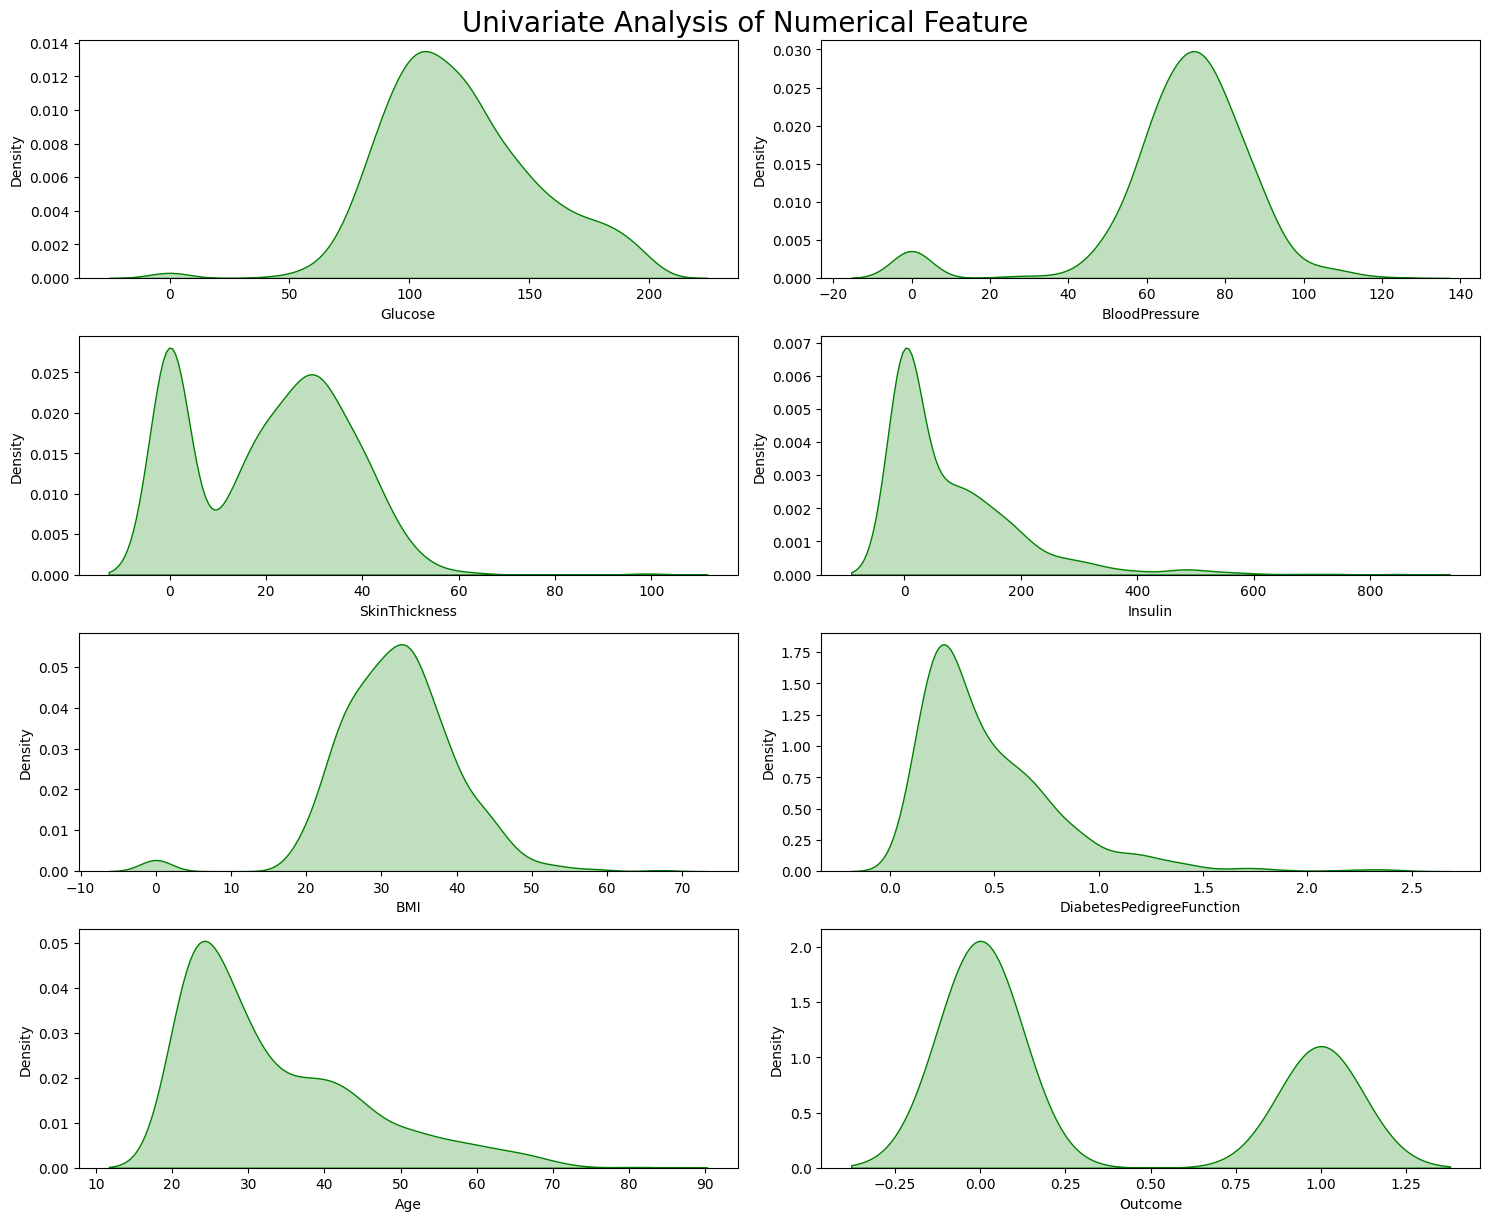

In [215]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Feature',fontsize=20)

for i in range(0,len(numerical_feature)):
  plt.subplot(5,2,i+1)
  sns.kdeplot(x=df[numerical_feature[i]],fill=True,color='green')
  plt.xlabel(numerical_feature[i])
  plt.tight_layout()
    

In [216]:
print(" Insulin , DiabetesPedigreeFunction , Age are right skewed and positive skewed ")

 Insulin , DiabetesPedigreeFunction , Age are right skewed and positive skewed 


In [217]:
### It means that there are outliers in these columns 

### Scatter plot with each numerical feature to explore feature

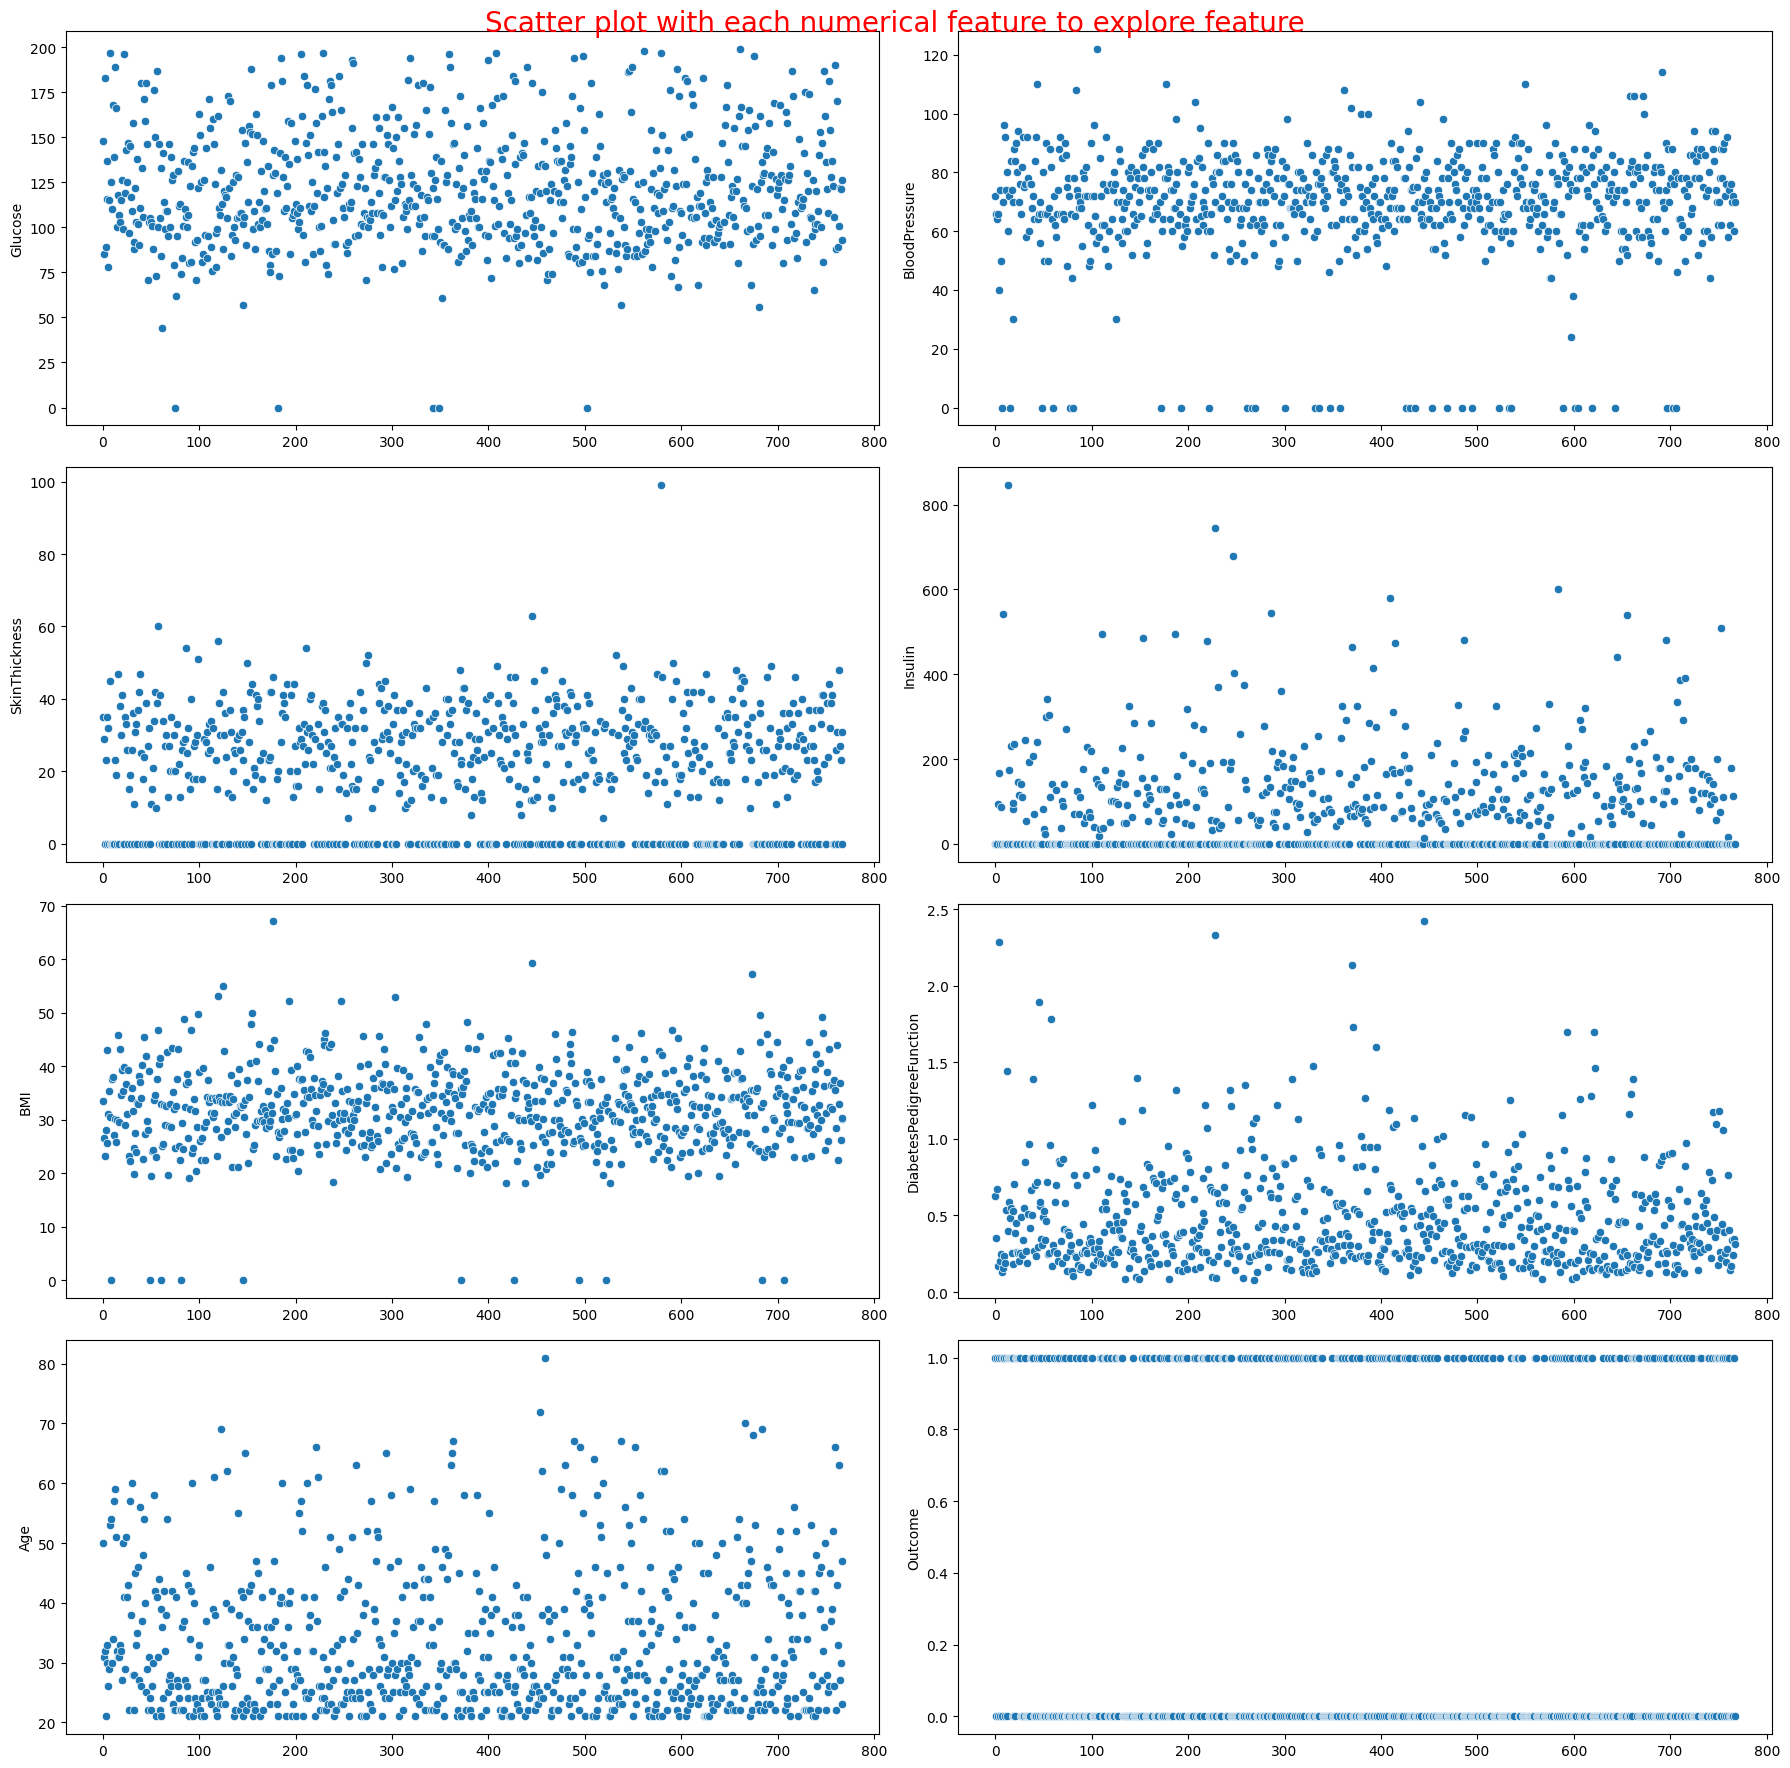

In [218]:
plt.figure(figsize=(18,18))
plt.suptitle("Scatter plot with each numerical feature to explore feature",fontsize=20,color='red')

for i in range(len(numerical_feature)): 
    plt.subplot(4,2,i+1)
    sns.scatterplot(y=numerical_feature[i],x=df.index,data=df)
    plt.ylabel(numerical_feature[i])
    plt.tight_layout()

### Multicollinearity in numerical features

In [219]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Ploting heatmap 

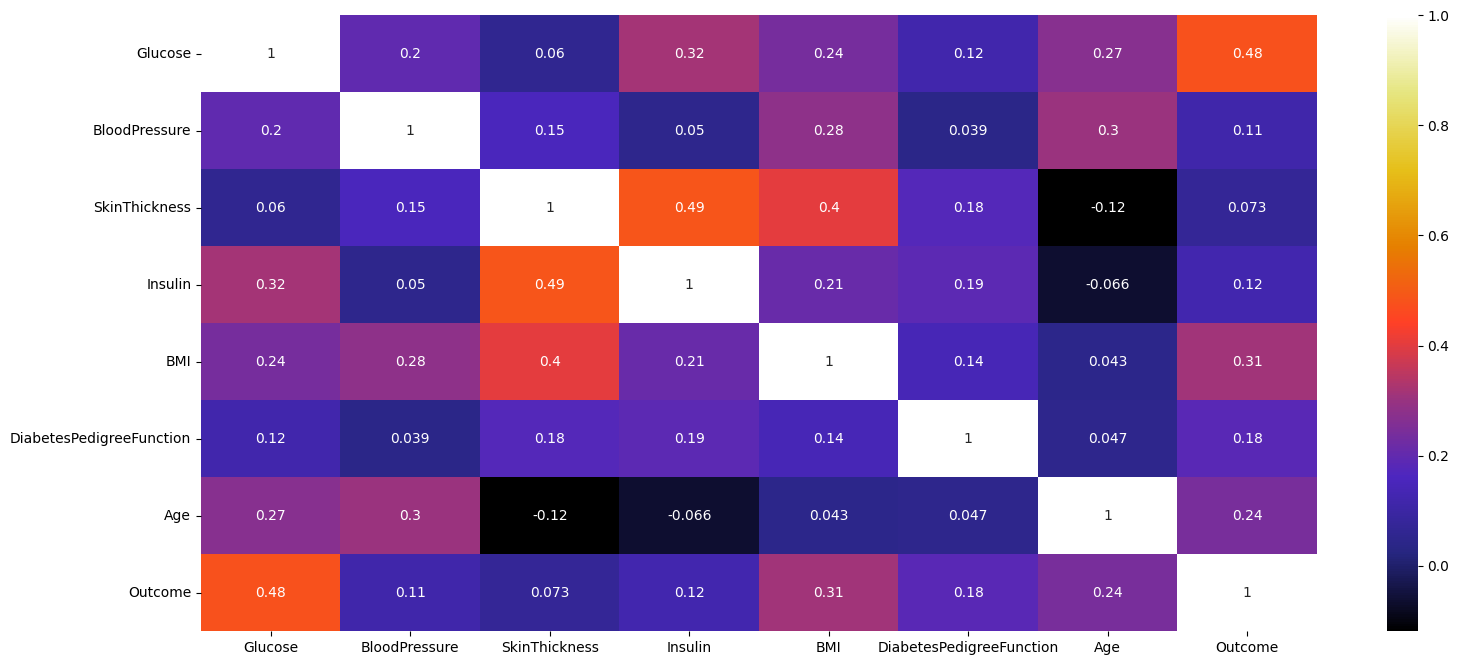

In [229]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),cmap='CMRmap' ,annot=True)
plt.show()

In [221]:
# age and skinThickness are -ve correlated columns

### Strip plot to see the relationship between numerical features and taraget column

C:\Users\Dell\AppData\Local\Temp\ipykernel_44700\2534332634.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y=numerical_feature[i],x='Outcome',data=df,palette='bright')
C:\Users\Dell\AppData\Local\Temp\ipykernel_44700\2534332634.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y=numerical_feature[i],x='Outcome',data=df,palette='bright')
C:\Users\Dell\AppData\Local\Temp\ipykernel_44700\2534332634.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y=numerical_feature[i],x='Outcome',data=df,palette='bright')
C:\Users\Dell\AppData\Local\Temp\ipykernel_44700\2534332634.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y=numerical_feature[i],x='Outcome',data=df,palette='bright')
C:\Users\Dell\AppData\Local\Temp\ipykernel_44700\2534332634.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  

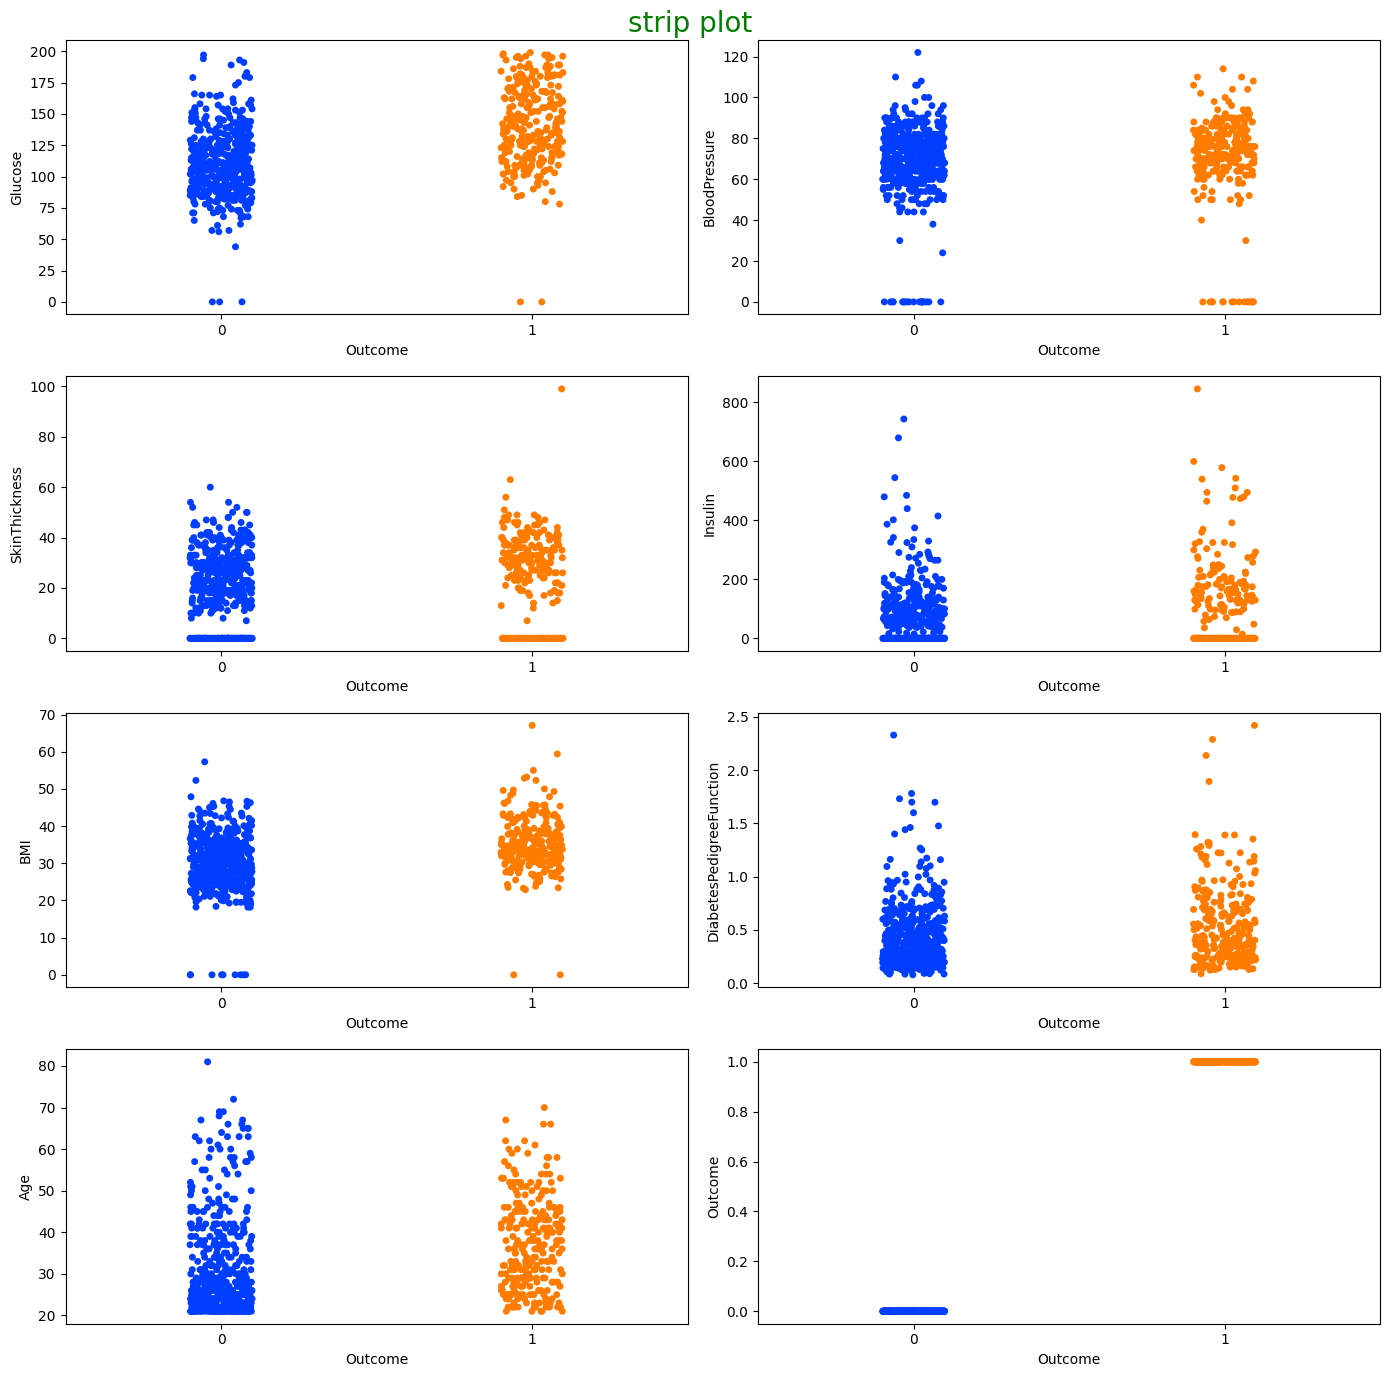

In [222]:
plt.figure(figsize=(14,14))
plt.suptitle("strip plot ",fontsize=20,color='green')

for i in range(len(numerical_feature)): 
    plt.subplot(4,2,i+1)
    sns.stripplot(y=numerical_feature[i],x='Outcome',data=df,palette='bright')
    plt.tight_layout()


### Boxplot to find outliers

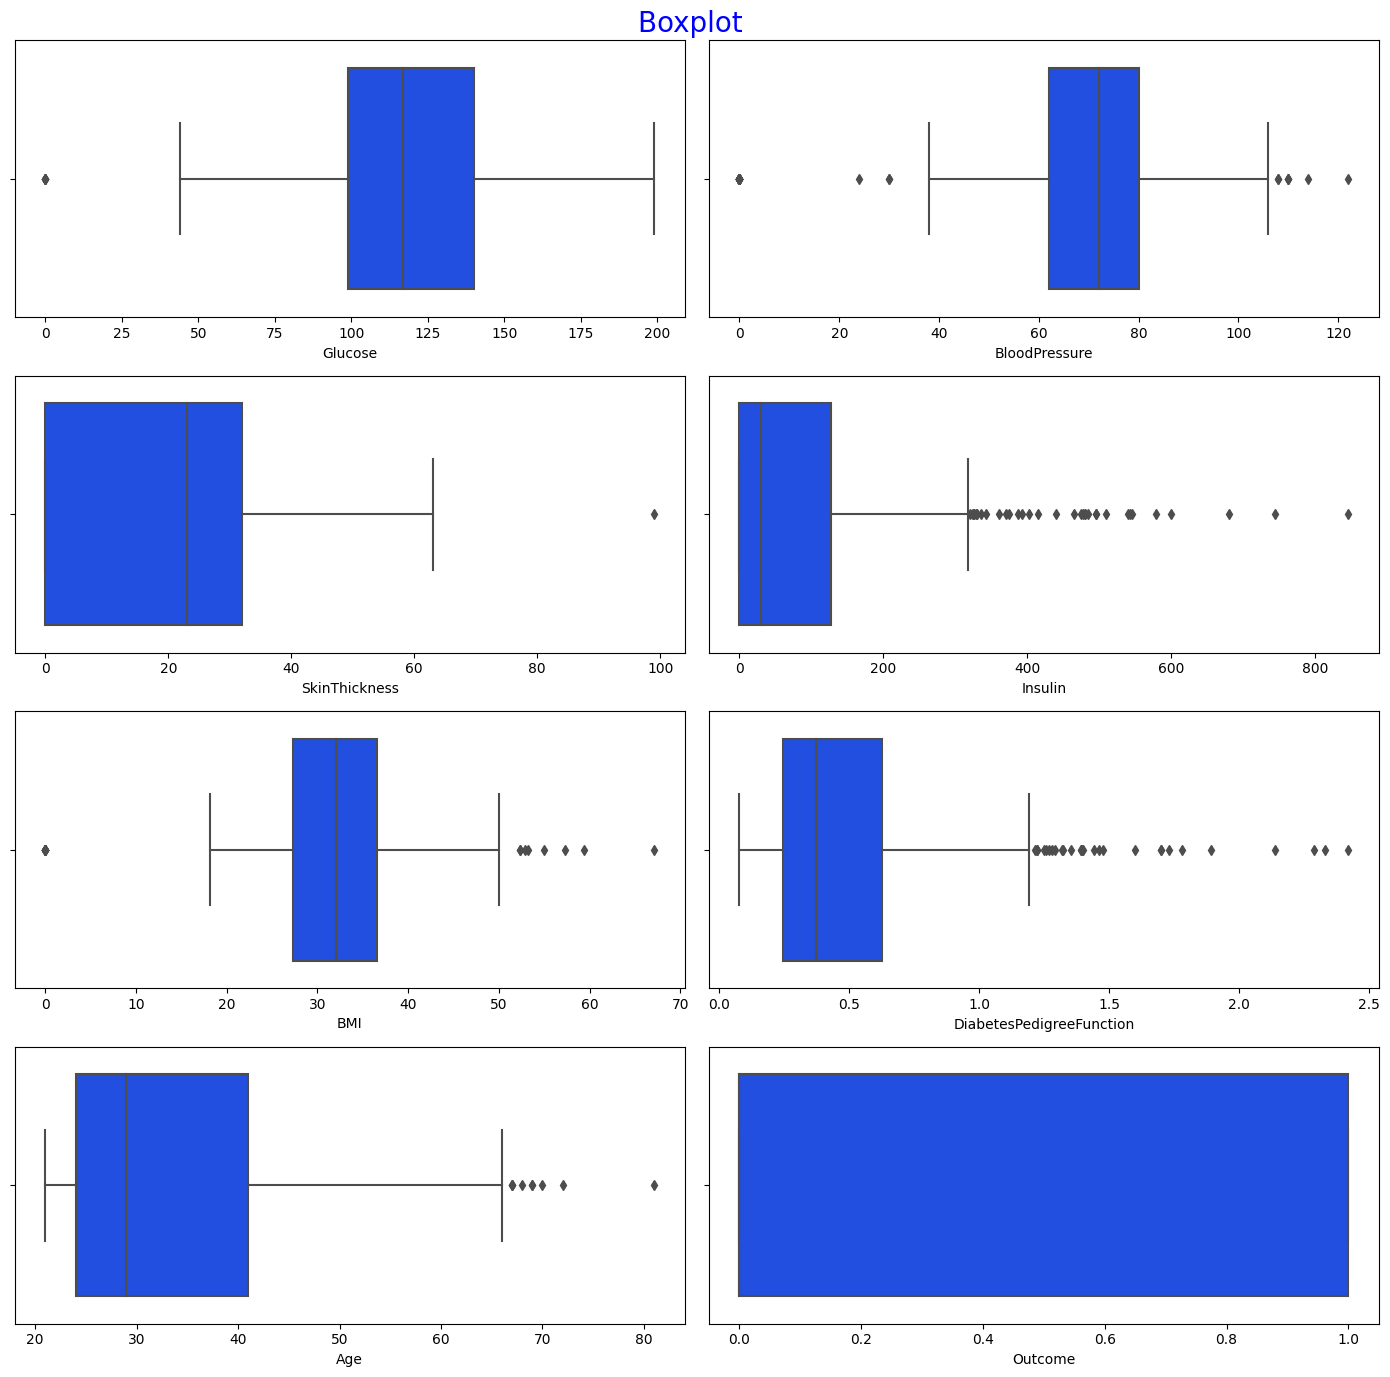

In [223]:
plt.figure(figsize=(14,14))
plt.suptitle("Boxplot ",fontsize=20,color='blue')

for i in range(len(numerical_feature)): 
    plt.subplot(4,2,i+1)
    sns.boxplot(x=numerical_feature[i],data=df,palette="bright")
    plt.tight_layout()

In [224]:
# There are some outliers in all columns

### Summary statistic for this dataset 

In [225]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [226]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:  
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        # Replace outliers with suitable values (median or mean)
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    return df

In [227]:
df = replace_outliers(df)

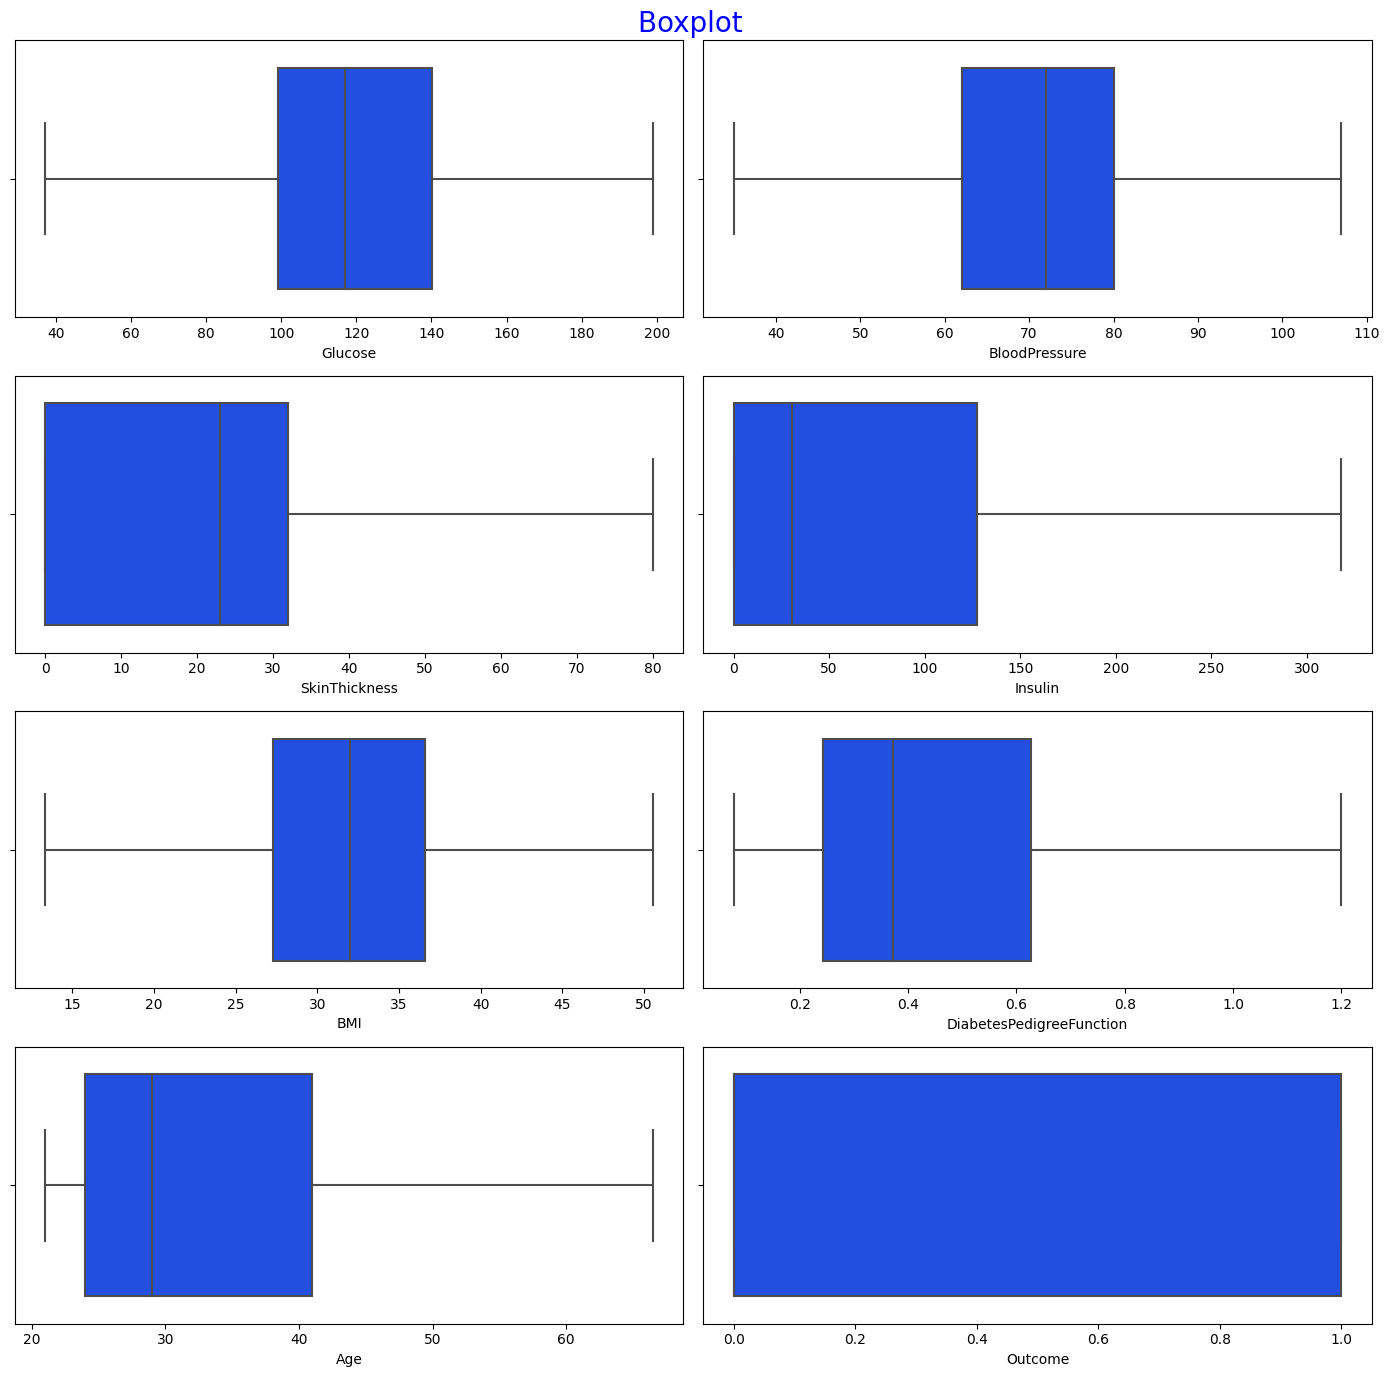

In [228]:
plt.figure(figsize=(14,14))
plt.suptitle("Boxplot ",fontsize=20,color='blue')

for i in range(len(numerical_feature)): 
    plt.subplot(4,2,i+1)
    sns.boxplot(x=numerical_feature[i],data=df,palette="bright")
    plt.tight_layout()

### train_test_split for model building

In [230]:
x = df.drop(columns=['Outcome'])

In [231]:
y = df['Outcome']

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [234]:
X_train.shape

(614, 7)

### Standardize and feature scaling of the dataset

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
scaler = StandardScaler()

In [237]:
X_train = scaler.fit_transform(X_train)

In [238]:
X_test = scaler.transform(X_test)

### Model training

In [239]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [249]:
classifiers = {
    'Logistic Regression': LogisticRegression(C=100, solver='liblinear', random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42,max_depth= 10, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 5, n_estimators= 100),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', probability=True, random_state=42)  
}

In [250]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])  # Calculate AUC for binary classification
    results[name] = {'Accuracy': accuracy, 'Confusion Matrix': confusion_mat, 'AUC': auc_score}

In [251]:
for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"AUC: {metrics['AUC']}")
    print()

Classifier: Logistic Regression
Accuracy: 0.7597402597402597
Confusion Matrix:
[[81 18]
 [19 36]]
AUC: 0.7937557392102846

Classifier: Random Forest Classifier
Accuracy: 0.7597402597402597
Confusion Matrix:
[[80 19]
 [18 37]]
AUC: 0.8170798898071625

Classifier: kNN
Accuracy: 0.6948051948051948
Confusion Matrix:
[[77 22]
 [25 30]]
AUC: 0.7389348025711662

Classifier: Decision Tree
Accuracy: 0.7337662337662337
Confusion Matrix:
[[76 23]
 [18 37]]
AUC: 0.7202020202020203

Classifier: Naïve Bayes
Accuracy: 0.7402597402597403
Confusion Matrix:
[[78 21]
 [19 36]]
AUC: 0.8051423324150597

Classifier: Support Vector Machine
Accuracy: 0.7337662337662337
Confusion Matrix:
[[79 20]
 [21 34]]
AUC: 0.8078971533516988



# Report: Comparison of Classifier Performance

In [253]:
model = LogisticRegression(C=100, solver='liblinear', random_state=42)

In [254]:
model

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [255]:
model.fit(X_train,y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [256]:
y_pred = model.predict(X_test)

In [257]:
accuracy_score(y_test,y_pred)

0.7597402597402597

In [258]:
import pickle

In [259]:
pickle.dump(model, open("model.pkl", "wb"))